# 🔴 Task 31-> Dimensionality Reduction Techniques

## **Principal Component Analysis (PCA)**

## 🌟 Import all the necessary Libraries

In [781]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
model = LogisticRegression(max_iter=1000)

## 🌟 Load the Iris Dataset with data and target

In [782]:
iris = load_iris()
X = iris.data
y = iris.target

## 🌟 Split into Training and Testing Sets

In [783]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🌟 Standardize the data for PCA

In [784]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 🌟 Apply PCA

In [785]:
p = PCA()
trainp = p.fit_transform(X_train_std)

## 🌟 Calculate the cumulative explained variance

In [786]:
cvr = np.cumsum(p.explained_variance_ratio_)

## 🌟 Number of components for 85% variance explained

In [787]:
n_components = np.argmax(cvr >= 0.85) + 1

## 🌟 Apply PCA with the selected number of components

In [788]:
p = PCA(n_components=n_components)
X_train_pca = p.fit_transform(X_train_std)
X_test_pca = p.transform(X_test_std)

## 🌟 Outputs 🌟 

In [789]:
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (120, 4)
Reduced Training Data Shape (PCA): (120, 2)
Number of Components Selected: 2


## **Linear Discriminant Analysis (LDA)**

In [790]:
X2, y2 = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=43)

## 🌟 Split into Training and Testing Sets

In [791]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🌟 Standardize the data for PCA

In [792]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 🌟 Apply LDA and transform the data to fit

In [793]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

## 🌟 Calculate Variance Ratio

In [794]:
explained_variance_ratio = lda.explained_variance_ratio_

## 🌟 Cummulative Variance Ratio

In [795]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

## 🌟 Number of components for 85% variance explained

In [796]:
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1


## 🌟 Apply LDA with the selected number of components

In [797]:
X_train_lda_selected = lda.transform(X_train)[:, :n_components]
X_test_lda_selected = lda.transform(X_test)[:, :n_components]

## 🌟 Outputs 🌟 

In [798]:
print(f"Number of components selected: {n_components}")

Number of components selected: 1


## **Singular Value Decomposition (SVD)** 

## 🌟 Initialize SVD and fit

In [799]:
svd = TruncatedSVD(n_components=X_train.shape[1] - 1)
X_train_svd = svd.fit_transform(X_train)

## 🌟 SVD Variance Ratio

In [800]:
 explained_variance_ratio = svd.explained_variance_ratio_

## 🌟 SVD Cummulative Variance ratio

In [801]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

## 🌟 Number of components for 85% variance explained

In [802]:
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1

## 🌟 Apply SVD with the selected number of components

In [803]:
X_train_svd_selected = svd.transform(X_train)[:, :n_components]
X_test_svd_selected = svd.transform(X_test)[:, :n_components]

## 🌟 Outputs 🌟 

In [804]:
print(f"Number of components selected: {n_components}")

Number of components selected: 2


## **t-distributed Stochastic Neighbor Embedding (T-SNE)**

In [805]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

## Train the Logistic Regression Model & Output Accuracy

In [806]:
model = LogisticRegression()
model.fit(X_train_tsne, y_train)
score_tsne = model.score(X_test_tsne, y_test)
print(f"Logistic Regression Accuracy with t-SNE: {score_tsne:.2f}")

Logistic Regression Accuracy with t-SNE: 0.30


## **Independent Component Analysis (ICA)**

## 🌟 Center the Data

In [807]:
X_centered = X - X.mean(axis=0)

## 🌟 Create an ICA model

In [808]:
ica = FastICA(n_components=3, random_state=42)

## 🌟 Fit the ICA model and transform the data

In [809]:
X_ica = ica.fit_transform(X_centered)

## 🌟 Outputs 🌟 

In [810]:
print("Independent components:")
print(ica.components_)

# Print the mixing matrix
print("\nMixing matrix:")
print(ica.mixing_)

Independent components:
[[-0.10759944 -2.35976743  0.13514761 -0.86999319]
 [-0.28909407 -0.00785423  0.49781866  0.43463659]
 [ 2.46675482 -1.11648228 -0.3288617  -1.71562749]]

Mixing matrix:
[[-2.48906644e-01  6.56465683e-01  4.31119437e-01]
 [-3.79918425e-01 -2.04828055e-01  3.14161291e-04]
 [-6.47823162e-02  1.73699499e+00  2.62112575e-01]
 [-9.82235669e-02  7.44214969e-01 -1.34548983e-02]]


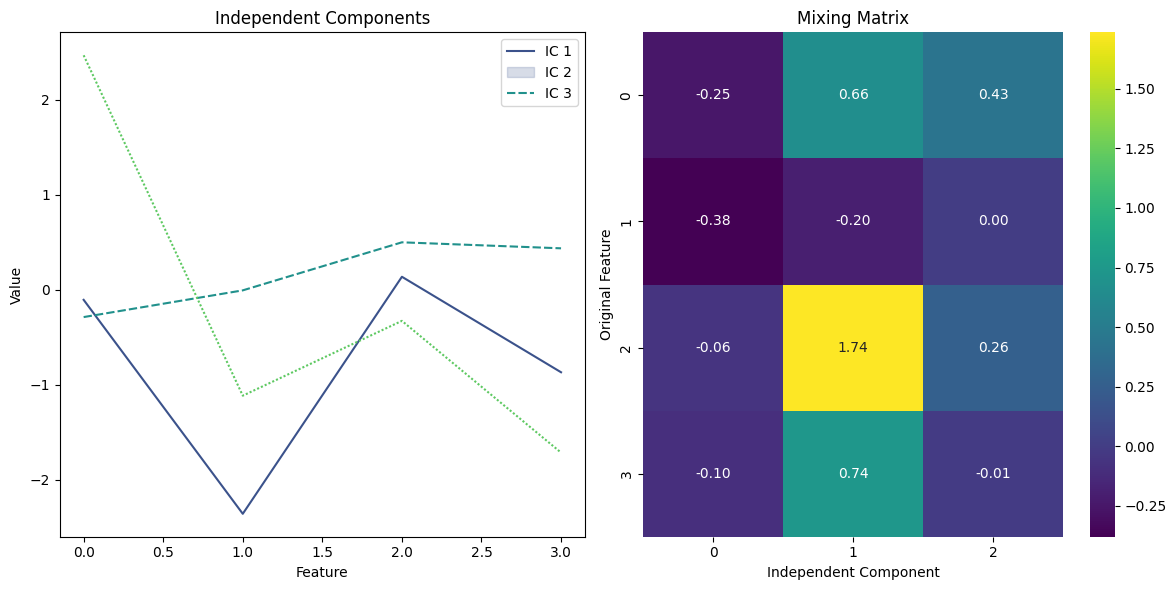

In [811]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=ica.components_.T, palette="viridis")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.title("Independent Components")
plt.legend([f"IC {i+1}" for i in range(ica.n_components)])

plt.subplot(1, 2, 2)
sns.heatmap(ica.mixing_, cmap="viridis", annot=True, fmt=".2f")
plt.xlabel("Independent Component")
plt.ylabel("Original Feature")
plt.title("Mixing Matrix")
plt.tight_layout()
plt.show()

## **SelectKBest (SKB)**

In [812]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [813]:
selector = SelectKBest(f_classif, k=30)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [814]:
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
print("Accuracy with SelectKBest:", accuracy_score(y_test, y_pred_selected))

Accuracy with SelectKBest: 0.9736842105263158


## **Recursive Feature Elimination (RFE)**

In [815]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=30, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [816]:
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
print("Accuracy with RFE:", accuracy_score(y_test, y_pred_rfe))

Accuracy with RFE: 0.9736842105263158
